## Homework 5

## Problem Description

You are given the data '04car_train.txt' which includes a set of cars with their attributes. Your goal is to build a linear model that considers the price of cars (the first column in the data) as the response of the other car attributes. The homework will be graded based on two parts: (80pt) The following report on model estimation and selection, and (20pt) the prediction performance of your model using a set of test data held by the TA. Details will be explained as follows.

## Preparation

* You will need numpy and matplotlib, as usual, but also the wonderful packages from [Scikit-Learn](http://scikit-learn.org/)

In [2]:
# use this if you are using ipython notebook, otherwise comment it out
%matplotlib inline 

# loading all packages... #
import numpy as np 
from sklearn import decomposition
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
 StandardScaler
import matplotlib.pyplot as plt

Note, we've given you several base packages here, but you may need to look at the documentation to find functions better suited to your needs. 

* Next, you will need to import the data, as an array. 
    - Make sure the .txt file is in the same directory/folder as your code. 

In [14]:
data = np.genfromtxt('04car.txt')

In class we talked about Data Standardization. Given that we will be using PCA and Linear Models, we don't want to pre-assign weights to the variable...that should be a discovered property. Therefore, we want the data columns to have a zeroed-out mean, and unit variance...i.e. their "position" and "scaling" should not be very different, while the trends in the data should be preserved. 

Find an appropriate scaling function in the `sklearn.preprocessing` sub-module, by reading the documentation [here](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing). Then, complete the import by erasing the `?` and replacing it with the proper function, after uncommenting the lines.

In [9]:
#from sklearn.preprocessing import ???
#data_scaled = ???().fit_transform(data) # preprocess the data

## Step 0. Visualize your data (10pt)

#### Perform PCA on attributes and plot out all cars on the plan of PC1 and PC2. Tag cars with their prices. 
* Hint: PCA is a truncation of the matrices found in Singular Value Decomposition. You can use that fact to find the simplest function to use in the documentation [here](http://scikit-learn.org/stable/modules/decomposition.html#decompositions). Like before, find the appropriate function (this time in the `sklearn.decomposition` submodule) and complete the below code. 

* You may desire to see just how much variance is preserved in 2D space (how "good" you approximation is). you can use `svd.explained_variance_ratio_.sum()` to calculate the *sum* of explained variance in your projection as a fraction of the total (all PCs will be 100%, so 2 PCs should be something lower. Let's put this in the title of our plot. 

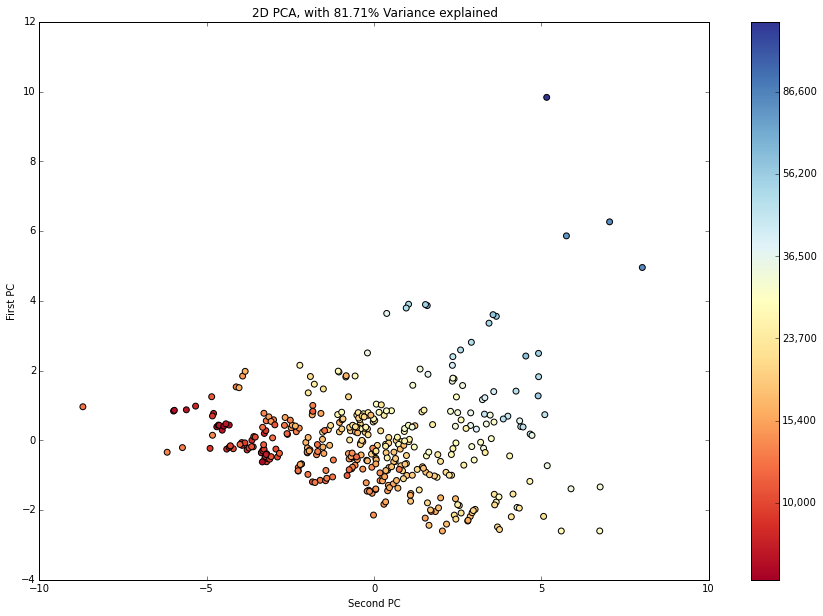

In [45]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=2)
X_pca = pca.fit_transform(data_scaled) # Projects data into 2-dimensions, using the two highest PCs

from matplotlib.colors import LogNorm # use a logscale for better visualization
fig, ax = plt.subplots(figsize=(15,10))
price = data[:,0] # the first column contains our (unscaled) prices
cm = plt.cm.get_cmap('RdYlBu') # what colormap type we want (red->yellow->blue)
sc = ax.scatter(X_pca[:,0], X_pca[:,1], 
                 norm=LogNorm(vmin=price.min(), vmax=price.max()), 
                 c=price, s=35, cmap=cm) # scatterplot, with color

cbar = fig.colorbar(sc, ticks=np.logspace(4., 5.5, num=9)) # add a bar for reference
cbar.ax.set_yticklabels(['{:,.0f}'.format(i) for i in np.round(np.logspace(4., 5.5, num=9),-2)])# what bar ticks to have

ax.set_title("2D PCA, with "+'{0:.2%}'.format(pca.explained_variance_ratio_.sum())+" Variance explained")
ax.set_ylabel("First PC")
ax.set_xlabel("Second PC")

Notice the trend/trends we see when we overlay prices? That indicates an underlying structure in the data...we never told it to order the data according to price, and yet they have a gradient of sorts. In other words, it seems as though price correlates well with the other variables quite ofter 


## Step 1. Create a simple linear model (20pt)

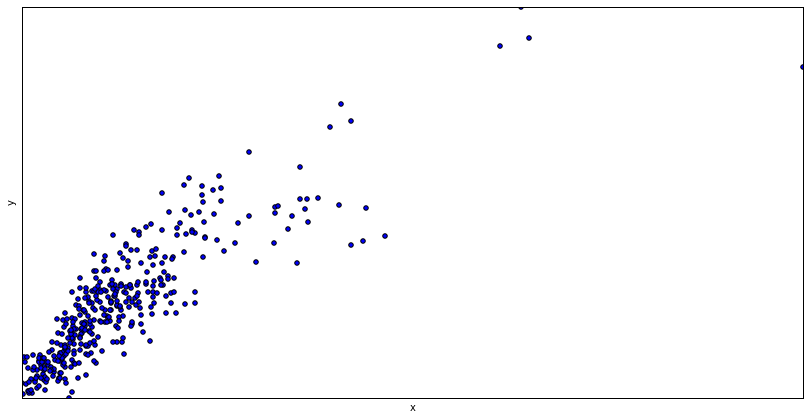

In [7]:
# response are car prices, i.e., the first column of the data matrix #
y = data_scaled[:,0]

# covariates are the other columns. Dealer cost is not included since it correlates too much with the price #
X = data_scaled[:,2:data_scaled.shape[1]]

# # split only on our side
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
# test_size=0.1, random_state=0)

# use the following for students
X_train = X;
y_train = y;

# a set of linear models with polynomial terms
n, p = X_train.shape # get #samples and #dimensions
degrees = [1] # create a simple linear model with no polynomial terms
error = np.zeros(len(degrees)) # training error
ncv = 10 # number of cross valiation 
scores = np.zeros((len(degrees),ncv)) # cv error


plt.figure(figsize=(14, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    error[i] = ((pipeline.predict(X_train) - y_train)**2).sum()
    
    yhat = pipeline.predict(X_train)

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X_train, y_train, scoring="mean_squared_error", cv=ncv)
    
    plt.scatter(y_train, yhat)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((min(y_train), max(y_train)))
    plt.ylim((min(yhat), max(yhat)))

## Step 2. Now use the same code to create multiple models and compare (30pt)

Compare models using crossvalidation, AIC and BIC. Discuss how model complex affects the training error and these model selection criteria.

In [ ]:
%matplotlib inline # use this if you are using ipython notebook, otherwise comment it out

# loading all packages... #
import numpy as np 
from sklearn import decomposition
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# loading the data #
data = np.genfromtxt('04car.txt')
data_scaled = StandardScaler().fit_transform(data) # preprocess the data

# response are car prices, i.e., the first column of the data matrix #
y = data_scaled[:,0]

# covariates are the other columns. Dealer cost is not included since it correlates too much with the price #
X = data_scaled[:,2:data_scaled.shape[1]]

# # split only on our side
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
# test_size=0.1, random_state=0)

# use the following for students
X_train = X;
y_train = y;

# a set of linear models with polynomial terms
n, p = X_train.shape # get #samples and #dimensions
degrees = [1, 2, 3] 
error = np.zeros(len(degrees)) # training error
ncv = 10 # number of cross valiation 
scores = np.zeros((len(degrees),ncv)) # cv error


plt.figure(figsize=(14, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    error[i] = ((pipeline.predict(X_train) - y_train)**2).sum()
    
    yhat = pipeline.predict(X_train)

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X_train, y_train, scoring="mean_squared_error", cv=ncv)
    
    plt.scatter(y_train, yhat)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((min(y_train), max(y_train)))
    plt.ylim((min(yhat), max(yhat)))

# Step 3. Propose your own model and compare with the above ones (20pt)

Propose your own linear model (does not have to contain only polynomial terms). Report its crossvalidation, AIC and BIC scores. 